In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

%matplotlib inline

Dataset generation and test-train split

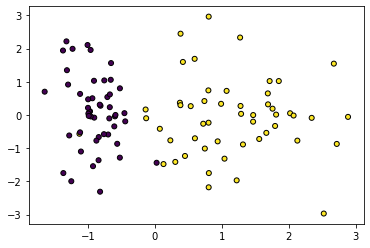

In [2]:
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,n_clusters_per_class=1)
X = np.array(X)
Y = np.array(Y.reshape(100,1))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y.reshape(100,),
            s=25, edgecolor='k')
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)


Cross entropy calculation:

In [0]:
def cross_entropy(Y_pred, Y):
  loss = - (Y * np.log(Y_pred+(1e-10)) +  (1-Y)*np.log(1-Y_pred+(1e-10)))/Y.shape[0]
  return sum(loss)

def cross_entropy_derrivative(Y_pred, Y):
  return - (Y * 1/(Y_pred+1e-10) - (1-Y) * 1/(Y_pred+1e-10))/Y.shape[0]

*   Input layer is going to have two inputs + bias
*   Hidden layer is going to have six inputs + bias
*   Output layer is going to have one output - in the range <0,1> - sigmoid output

Created network for 2 input features, with 6 neurons in hidden layer, with 1 as the output count


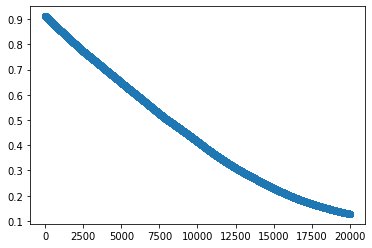

In [10]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
  return sigmoid(x)*(1-sigmoid(x))

def relu(x):
  return np.maximum(0,x)

def relu_derivative(x):
  X = np.copy(x)
  X[x<0]=0
  X[x>=0]=1
  return X

def add_bias_unit(X):
    return np.append(np.ones(X.shape[0]).reshape(-1,1), X, axis=1)

class Perceptron:
    def __init__(self, input_sz,hidden_sz,output_sz):
        self.input_sz = input_sz
        self.hidden_sz = hidden_sz
        self.output_sz = output_sz
    
        self.W1_input = None
        self.W1 = np.random.randn(input_sz+1, hidden_sz)
        self.W1_output = None
        self.W1_activation = None

        self.W2_input = None
        self.W2 = np.random.randn(hidden_sz+1, output_sz)
        self.W2_output = None
        self.W2_activation = None
        print("Created network for", input_sz, "input features, with", hidden_sz, "neurons in hidden layer, with", output_sz, "as the output count")

    def predict(self, X):
        #First layer
        self.W1_input = add_bias_unit(X)
        self.W1_output = np.dot(self.W1_input, self.W1)
        self.W1_activation = relu(self.W1_output)

        #Second layer
        self.W2_input = add_bias_unit(self.W1_activation)
        self.W2_output = np.dot(self.W2_input, self.W2)
        self.W2_activation = sigmoid(self.W2_output)

        return self.W2_activation

    def backprop(self, X,Y, learning_rate):
        Y_pred = self.predict(X)
        delta = cross_entropy_derrivative(Y_pred, Y)
        
        #Backprop thorugh second matrix and update W2 weights
        delta = delta * sigmoid_derivative(self.W2_output)
        W2_gradient = np.dot(self.W2_input.T, delta)
        self.W2 -= learning_rate * W2_gradient
        #Get rid of bias unit
        delta = np.dot(delta, self.W2.T)[:,1:]
        
        #Backprop thorugh first matrix and update W1 weights
        delta = delta * relu_derivative(self.W2_output)
        W1_gradient = np.dot(self.W1_input.T, delta)
        self.W1 -= learning_rate * W1_gradient 
    
    def train(self, X_train, Y_train, learning_rate, epochs):
        train_losses = []
        for i in range(epochs):
            Y_predicted = self.predict(X_train)
            error_rate = cross_entropy(Y_predicted, Y_train)
            self.backprop(X_train,Y_train,learning_rate)
            train_losses.append(error_rate)
        plt.plot(np.arange(len(train_losses)), train_losses, marker='o')
model = Perceptron(2,6,1)
model.train(X_train, Y_train, 0.0001, 20000)

Now, lets test how model behaves on data unseen earlier:

In [11]:
def accuracy(Y_pred,Y_test):
    score = np.zeros_like(Y_pred)
    score[Y_pred>0.5] = 1
    return sum(score==Y_test)/Y_test.shape[0]

print("Accuracy on unseen data is:", accuracy(model.predict(X_test),Y_test))

Accuracy on unseen data is: [0.95]
